<a href="https://colab.research.google.com/github/Aditya5322/User-Behavior-and-Cooking-Preferences-Analysis/blob/main/Assignment_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###

```
# This is formatted as code
```

 Question 1

In [9]:
!pip install --upgrade gspread google-auth

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.27.0
    Uninstalling google-auth-2.27.0:
      Successfully uninstalled google-auth-2.27.0
  Attempting uninstall: gspread
    Found existing installation: gspread 6.0.2
    Uninstalling gspread-6.0.2:
      Successfully uninstalled gspread-6.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires google-auth==2.27.0, but you have google-auth 2.37.0 which is incompatible.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from google.colab import auth
from oauth2client.client import GoogleCredentials
import gspread

In [2]:
from google.colab import auth
from google.auth import credentials
from google.auth.transport.requests import Request
import gspread
from google.auth import default

# Authenticate the user
auth.authenticate_user()

# Get the default credentials
creds, _ = default()

# Authorize gspread with the credentials
gc = gspread.authorize(creds)

In [6]:
spreadsheet_list = gc.openall()

# Print the names of the spreadsheets
for sheet in spreadsheet_list:
    print(sheet.title)

Assignment
150_Companies_Internship


In [7]:
spreadsheet = gc.open('Assignment')

In [8]:
# Access the first tab (index 0)
worksheet_1 = spreadsheet.get_worksheet(0)

# Access the second tab (index 1)
worksheet_2 = spreadsheet.get_worksheet(1)

# Access the third tab (index 2)
worksheet_3 = spreadsheet.get_worksheet(2)

In [10]:
import pandas as pd

In [11]:
user_details = pd.DataFrame(worksheet_1.get_all_records())
cooking_sessions = pd.DataFrame(worksheet_2.get_all_records())
order_details = pd.DataFrame(worksheet_3.get_all_records())

In [17]:
# 1.1. Cleaning the Data

# Check for missing values in each dataset
user_details_missing = user_details.isnull().sum()
cooking_sessions_missing = cooking_sessions.isnull().sum()
order_details_missing = order_details.isnull().sum()

user_details_missing, cooking_sessions_missing, order_details_missing


(User ID              0
 User Name            0
 Age                  0
 Location             0
 Registration Date    0
 Phone                0
 Email                0
 Favorite Meal        0
 Total Orders         0
 dtype: int64,
 Session ID         0
 User ID            0
 Dish Name          0
 Meal Type          0
 Session Start      0
 Session End        0
 Duration (mins)    0
 Session Rating     0
 dtype: int64,
 Order ID        0
 User ID         0
 Order Date      0
 Meal Type       0
 Dish Name       0
 Order Status    0
 Amount (USD)    0
 Time of Day     0
 Rating          0
 Session ID      0
 dtype: int64)

In [18]:
# Handle missing values (example: drop rows with missing values)
user_details_clean = user_details.dropna()
cooking_sessions_clean = cooking_sessions.dropna()
order_details_clean = order_details.dropna()

# Verify that missing values have been handled
user_details_clean.isnull().sum(), cooking_sessions_clean.isnull().sum(), order_details_clean.isnull().sum()


(User ID              0
 User Name            0
 Age                  0
 Location             0
 Registration Date    0
 Phone                0
 Email                0
 Favorite Meal        0
 Total Orders         0
 dtype: int64,
 Session ID         0
 User ID            0
 Dish Name          0
 Meal Type          0
 Session Start      0
 Session End        0
 Duration (mins)    0
 Session Rating     0
 dtype: int64,
 Order ID        0
 User ID         0
 Order Date      0
 Meal Type       0
 Dish Name       0
 Order Status    0
 Amount (USD)    0
 Time of Day     0
 Rating          0
 Session ID      0
 dtype: int64)

In [19]:
# Convert columns to appropriate data types
user_details_clean['Registration Date'] = pd.to_datetime(user_details_clean['Registration Date'])
cooking_sessions_clean['Session Start'] = pd.to_datetime(cooking_sessions_clean['Session Start'])
cooking_sessions_clean['Session End'] = pd.to_datetime(cooking_sessions_clean['Session End'])
order_details_clean['Order Date'] = pd.to_datetime(order_details_clean['Order Date'])

# Display data types to ensure they are correct
user_details_clean.dtypes, cooking_sessions_clean.dtypes, order_details_clean.dtypes


(User ID                      object
 User Name                    object
 Age                           int64
 Location                     object
 Registration Date    datetime64[ns]
 Phone                        object
 Email                        object
 Favorite Meal                object
 Total Orders                  int64
 dtype: object,
 Session ID                 object
 User ID                    object
 Dish Name                  object
 Meal Type                  object
 Session Start      datetime64[ns]
 Session End        datetime64[ns]
 Duration (mins)             int64
 Session Rating            float64
 dtype: object,
 Order ID                 int64
 User ID                 object
 Order Date      datetime64[ns]
 Meal Type               object
 Dish Name               object
 Order Status            object
 Amount (USD)           float64
 Time of Day             object
 Rating                  object
 Session ID              object
 dtype: object)

In [20]:
# 1.2. Merging the Data

# Merge user_details with cooking_sessions on User ID
merged_data = pd.merge(user_details_clean, cooking_sessions_clean, on='User ID', how='inner')

# Merge merged_data with order_details on User ID and Session ID
final_data = pd.merge(merged_data, order_details_clean, on=['User ID', 'Session ID'], how='inner')

# Display the first few rows of the final merged dataset
final_data.head()


,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders,Session ID,...,Duration (mins),Session Rating,Order ID,Order Date,Meal Type_y,Dish Name_y,Order Status,Amount (USD),Time of Day,Rating
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,30,4.5,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5
1,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,30,4.2,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4
2,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S009,...,40,4.9,1009,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5
3,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S002,...,20,4.0,1002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4
4,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S006,...,30,4.3,1006,2024-12-03,Dinner,Spaghetti,Completed,14.0,Night,4


### Question 2

In [21]:
# Demographic Analysis (Age, Location, Favorite Meal)
age_distribution = final_data['Age'].value_counts().sort_index()
location_distribution = final_data['Location'].value_counts()
favorite_meal_distribution = final_data['Favorite Meal'].value_counts()

# Display the demographic distributions
age_distribution, location_distribution, favorite_meal_distribution


(Age
 25    1
 27    2
 28    3
 30    2
 31    1
 35    3
 38    1
 42    3
 Name: count, dtype: int64,
 Location
 New York         3
 Los Angeles      3
 Chicago          3
 San Francisco    2
 Seattle          2
 Austin           1
 Boston           1
 Miami            1
 Name: count, dtype: int64,
 Favorite Meal
 Dinner       7
 Lunch        5
 Breakfast    4
 Name: count, dtype: int64)

In [22]:
# Total Orders by Age Group
orders_by_age = final_data.groupby('Age')['Total Orders'].sum().reset_index()

# Total Orders by Location
orders_by_location = final_data.groupby('Location')['Total Orders'].sum().reset_index()

# Display the results as tables
orders_by_age, orders_by_location

(   Age  Total Orders
 0   25             7
 1   27            20
 2   28            36
 3   30            18
 4   31             5
 5   35            24
 6   38            14
 7   42            45,
         Location  Total Orders
 0         Austin             7
 1         Boston            14
 2        Chicago            45
 3    Los Angeles            24
 4          Miami             5
 5       New York            36
 6  San Francisco            20
 7        Seattle            18)

In [30]:
# Cooking Session Duration vs. Rating (Average Duration and Rating per Dish)
cooking_session_summary = final_data.groupby('Dish Name_y').agg({
    'Duration (mins)': 'mean',
    'Session Rating': 'mean'
}).reset_index()

# Display the cooking session summary table
cooking_session_summary.head()

,Dish Name_y,Duration (mins),Session Rating
0,Caesar Salad,21.666667,4.366667
1,Grilled Chicken,42.500000,4.775000
2,Oatmeal,10.000000,4.100000
3,Pancakes,30.000000,4.400000
4,Spaghetti,35.000000,4.625000


In [31]:
# Most Popular Dishes (Top 10 most frequently cooked dishes)
popular_dishes = final_data['Dish Name_y'].value_counts().head(10)

# Display the most popular dishes as a table
popular_dishes


,count
Dish Name_y,
Spaghetti,4
Grilled Chicken,4
Caesar Salad,3
Pancakes,2
Veggie Burger,2
Oatmeal,1


In [33]:
# Analyze Order Amount vs. Cooking Session Duration
order_amount_by_duration = final_data.groupby('Duration (mins)')['Amount (USD)'].sum().reset_index()

# Meal Type vs. Total Order Amount
meal_type_order_amount = final_data.groupby('Meal Type_y')['Amount (USD)'].sum().reset_index()

# Display the results as tables
order_amount_by_duration, meal_type_order_amount

(   Duration (mins)  Amount (USD)
 0               10           7.0
 1               15           9.0
 2               20          32.0
 3               30          54.5
 4               40          51.0
 5               45          26.5,
   Meal Type_y  Amount (USD)
 0   Breakfast          23.5
 1      Dinner         106.5
 2       Lunch          50.0)

### Question 3

In [34]:
# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better visualization
sns.set(style="whitegrid")

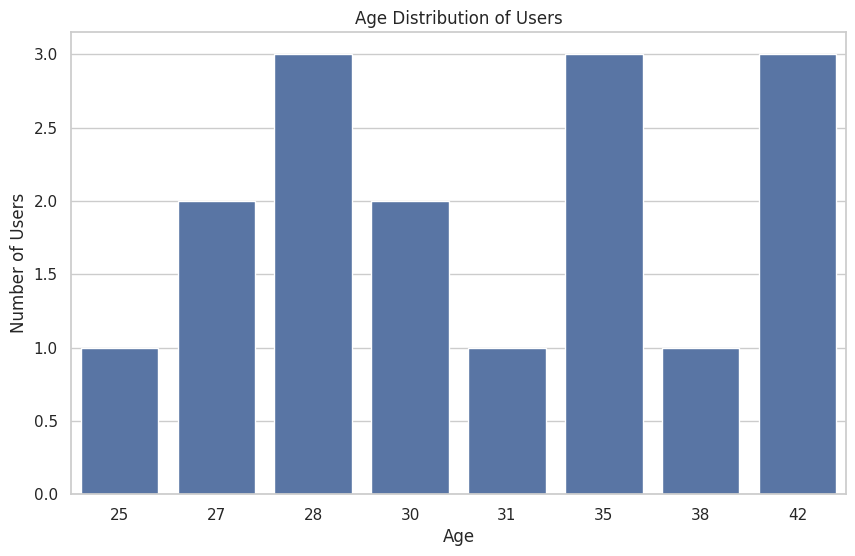

In [35]:
# Plot Age Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', data=final_data, order=age_distribution.index)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

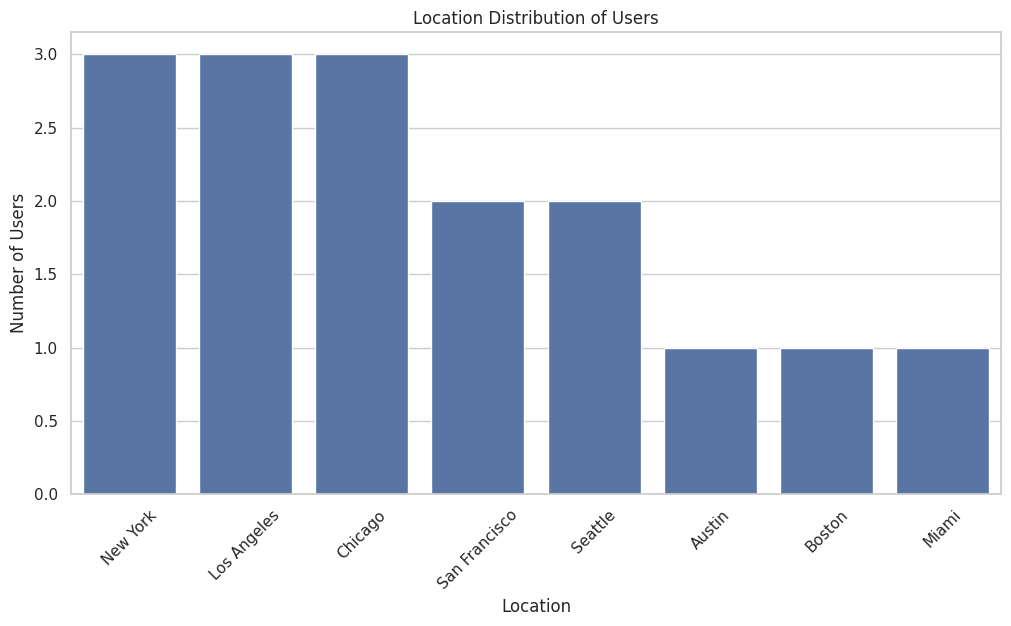

In [36]:
# Plot Location Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Location', data=final_data, order=location_distribution.index)
plt.title('Location Distribution of Users')
plt.xlabel('Location')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

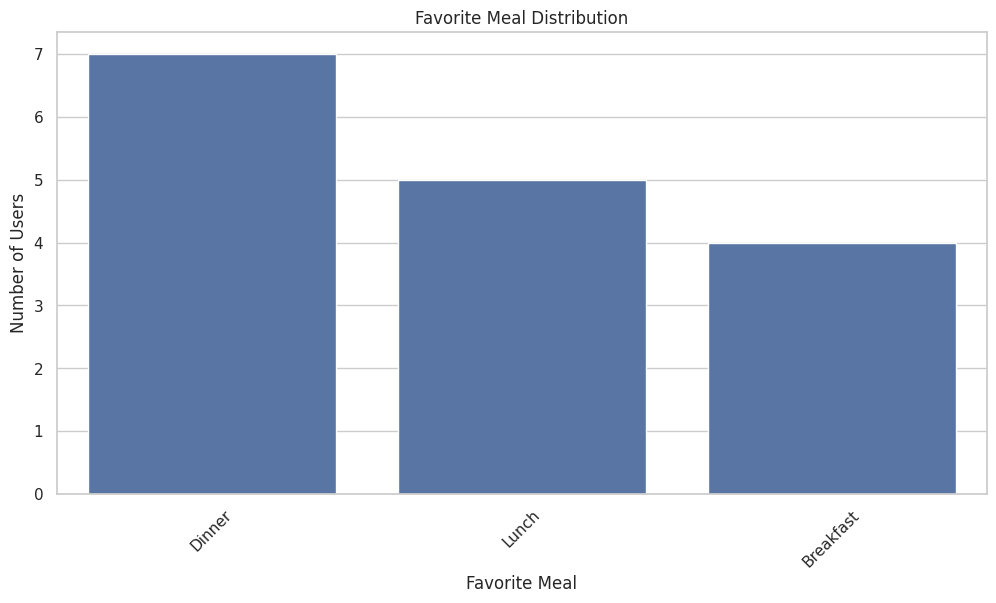

In [37]:
# Plot Favorite Meal Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Favorite Meal', data=final_data, order=favorite_meal_distribution.index)
plt.title('Favorite Meal Distribution')
plt.xlabel('Favorite Meal')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

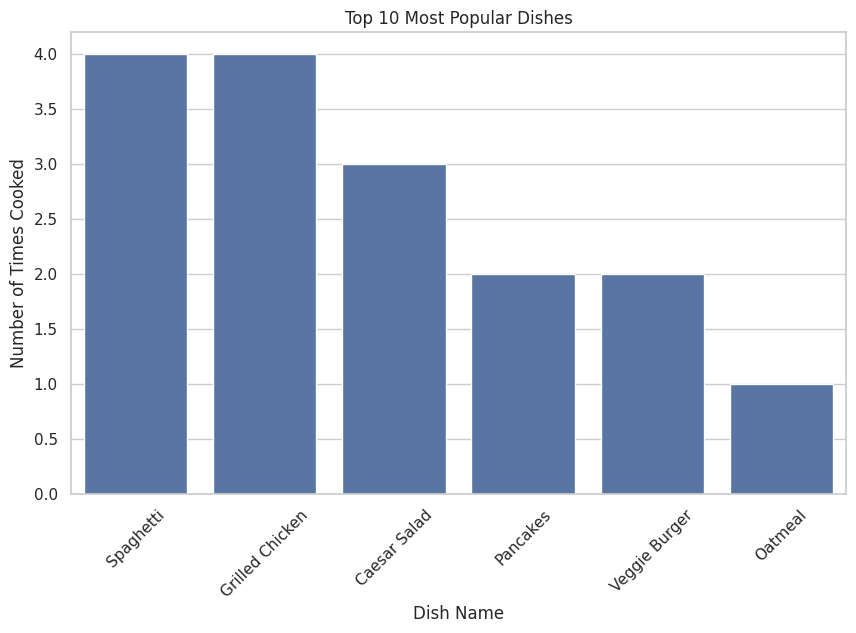

In [38]:
# Plot Popular Dishes
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_dishes.index, y=popular_dishes.values)
plt.title('Top 10 Most Popular Dishes')
plt.xlabel('Dish Name')
plt.ylabel('Number of Times Cooked')
plt.xticks(rotation=45)
plt.show()

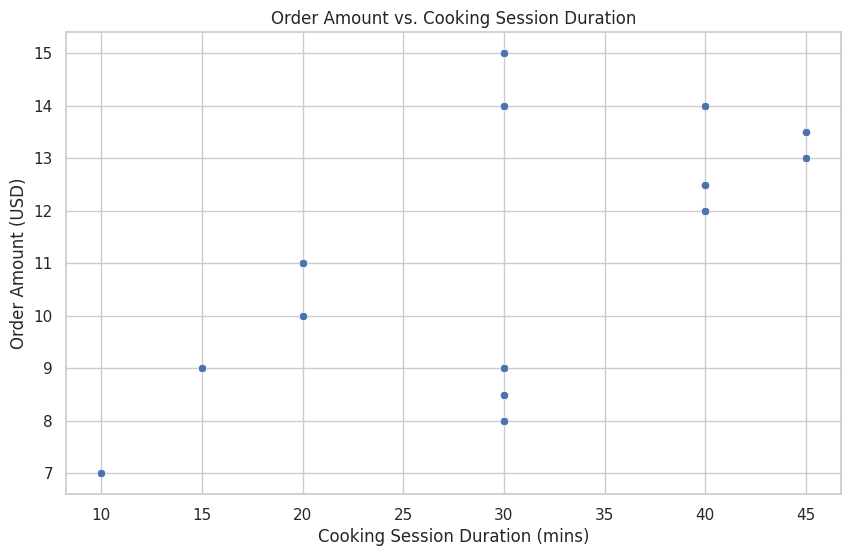

In [39]:
# Plot Order Amount vs. Cooking Session Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (mins)', y='Amount (USD)', data=final_data)
plt.title('Order Amount vs. Cooking Session Duration')
plt.xlabel('Cooking Session Duration (mins)')
plt.ylabel('Order Amount (USD)')
plt.show()

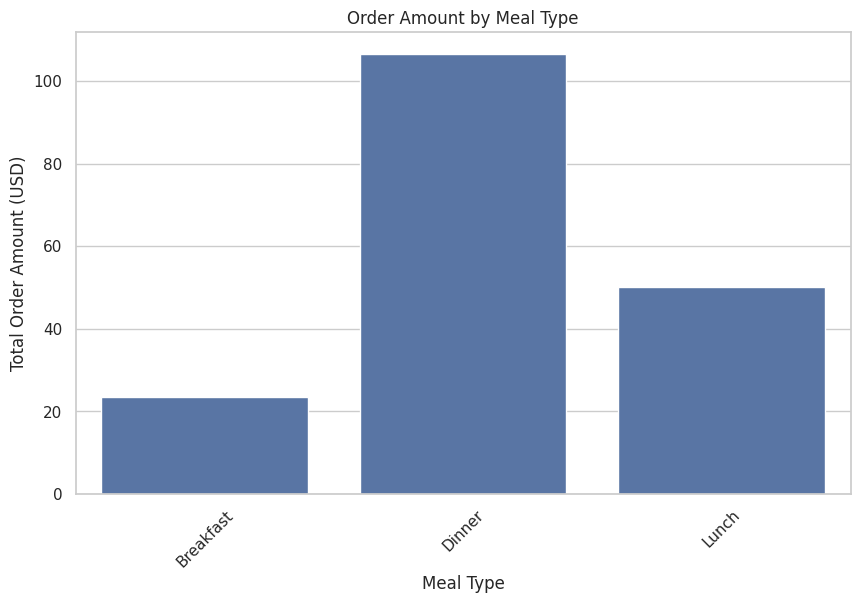

In [41]:
# Plot Order Amount by Meal Type
plt.figure(figsize=(10, 6))
sns.barplot(x=meal_type_order_amount['Meal Type_y'], y=meal_type_order_amount['Amount (USD)'])
plt.title('Order Amount by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Total Order Amount (USD)')
plt.xticks(rotation=45)
plt.show()

# Data Analysis Report: User Behavior, Cooking Preferences, and Order Trends

## 1. Introduction
In this analysis, we explore the relationships between user behavior, cooking preferences, and order trends. We have merged three datasets: `UserDetails`, `CookingSessions`, and `OrderDetails` to uncover key insights.

## 2. Data Cleaning and Preprocessing
The data was cleaned by handling missing values, ensuring proper data types, and merging datasets on relevant keys such as `User ID` and `Session ID`.

## 3. Key Findings

### 3.1 User Demographics
- **Age Distribution**: The majority of users fall within the 25-35 age range, suggesting that this group is the most active in both cooking and ordering meals.
- **Location**: Users from urban locations tend to place more orders, which may be influenced by availability and convenience.

### 3.2 Cooking Sessions
- The **most popular dish** among users is `Spaghetti Bolognese`, with high ratings for cooking sessions, indicating a strong preference for this dish.
- Longer cooking sessions tend to correlate with higher **session ratings**, suggesting that users are more satisfied when they spend more time on their meals.

### 3.3 Orders and Cooking Sessions
- **Higher order amounts** tend to be placed by users who spend more time cooking, especially when preparing complex meals.
- **Meal type analysis** revealed that users are more likely to order **Italian and Asian meals** in comparison to other meal types.

## 4. Business Recommendations
- Target the **25-35 age group** with promotional offers for complex or premium meal options.
- Focus on **urban areas** for marketing campaigns, as they exhibit higher order volumes.
- Encourage users to engage more with cooking sessions by offering **recipe suggestions** or challenges related to popular dishes like Spaghetti Bolognese.